<a href="https://colab.research.google.com/github/makafanpeter/CS4740-Techblog/blob/main/Music_Genre_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Convolutional Neural Network (CNN) Approach to Music Genre Classification


## Introduction
Music is becoming easier to access through the internet and musical apps like Spotify and Apple Music. With the escalating number of music available digitally on the internet, there is a growing demand for the systematic organization of audio files and thus a rise in the interest in automatic music genre classification. Moreover, detecting and grouping music of a similar genre is a keen part of the music recommendation system and playlist that are personalized to both your mood and your unique music taste.

Before assigning this task to a computer it would mean a great deal to understand how a person would carry out a similar task of classifying music into different genres, However, musical content is complex and music genres are not well defined.
How can a computer automatically classify sound-based genres? It turns out that classifying music into different genres would be considered a very challenging task for a computer due to the selection and extraction of appropriate audio features. 
Research in Music Information Retrieval (MIR) can make it easier to identify essential information like trends, popular genres, and performers. The first step in this direction is to identify music genres.

## Methodology 
There have been many different attempts of categorising music into distinct genres, for this project I am considering using a novel approach for the automatic music genre classification using Convolution Neural Networks (CNN). The two phases in music genre categorization are feature extraction and classification. Various features are extracted from the waveform in the first phase. The characteristics extracted from the training data are used to build a classifier in the second phase. In this blog post, we will walk through building a deep learning model for classifying music into different genres using the Gtzan dataset. We will walk through how to train a model, design the input and output for genre classifications, and finally display the accuracy results for the model.

## Gtzan Dataset
The gtzan8 audio dataset contains 1000 tracks of 30 second length. There are 10 genres, each containing 100 tracks which are all 22050Hz Mono 16-bit audio files in .wav format. The genres are:

The GTZAN Music Genre Dataset, which is a collection of 1000 songs in 10 genres, is the most widely used dataset.

Although many studies have been conducted using GTZAN, several faults have been pointed out. Sturm[1], for example, identified and analysed the contents of GTZAN and provided a catalogue of its faults. As it is the most used dataset, however, the system performance of MGC in this project should first be evaluated with GTZAN in order to compare against other systems used in other studies.

Details on the GTZAN Music Genre Dataset are presented in the table below. In GTZAN, each song is recorded at a sampling rate of 22.05 kHz and mono 16-bit audio files in .wav format.

* blues
* classical
* country
* disco
* hiphop
* jazz
* metal
* pop
* reggae
* rock

## Software Requirements

- Python 
- Numpy
- Matplotlib
- Scikit-learn
- Scikit-plot
- Keras
- Tensorflow
- Kapre
- Librosa
- pydub


## Perquisite

### Load packages

In [ ]:
%tensorflow_version 1.x
!pip install pydub


TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
import scipy
from scipy import misc
import glob
from PIL import Image
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
import IPython
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.optimizers import Adam
from keras.initializers import glorot_uniform
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from pydub import AudioSegment
import shutil
from keras.preprocessing.image import ImageDataGenerator
import random
import time
import io
print(tf.__version__)

1.15.2


Using TensorFlow backend.


### Download GTZAN Dataset

In [ ]:
!echo "Downloading Dataset..."
!curl -LO http://opihi.cs.uvic.ca/sound/genres.tar.gz
!tar -zxvf genres.tar.gz
!mv genres data
!echo "Dataset Downloaded"

!echo "Start Converting audio file format..."
!for genre in data/*; do
!    for filename in $genre/*; do
!        sox $filename "$filename.wav";
!        rm $filename;
!    done
!done
!echo "Converted au to wav"
!rm -r genres.tar.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1168M  100 1168M    0     0  2113k      0  0:09:26  0:09:26 --:--:-- 2123k
genres/
genres/bextract_single.mf
genres/bl.mf
genres/blues/
genres/cl.mf
genres/classical/
genres/co.mf
genres/country/
genres/di.mf
genres/disco/
genres/hi.mf
genres/hiphop/
genres/input.mf
genres/ja.mf
genres/jazz/
genres/me.mf
genres/metal/
genres/po.mf
genres/pop/
genres/re.mf
genres/reggae/
genres/ro.mf
genres/rock/
genres/rock/rock.00000.wav
genres/rock/rock.00001.wav
genres/rock/rock.00002.wav
genres/rock/rock.00003.wav
genres/rock/rock.00004.wav
genres/rock/rock.00005.wav
genres/rock/rock.00006.wav
genres/rock/rock.00007.wav
genres/rock/rock.00008.wav
genres/rock/rock.00009.wav
genres/rock/rock.00010.wav
genres/rock/rock.00011.wav
genres/rock/rock.00012.wav
genres/rock/rock.00013.wav
genres/rock/rock.00014.wav
genres/rock/rock.00015.wav
genres/

### Connect notebook to access your Google Drive files 

Google drive would be used to store music and spectogram data

In [ ]:
drive_path = '/content/g-drive'
from google.colab import drive
drive.mount(drive_path,force_remount=True)

Mounted at /content/g-drive


### Define Directory and File Paths

In [ ]:
# Source path 
source = '/content/data'

  
# home path 
home_path = '/MyDrive/Music-Clasification'
destination = drive_path + home_path

In [ ]:
path =  destination + "/spectrograms3sec"
if not os.path.exists(path):  
     os.makedirs(path)
else:
    print (path + " Already exists!")

path = destination +"/time_domain"
if not os.path.exists(path):  
     os.makedirs(path)
else:
    print (path + " Already exists!")

path = destination +"/power_spectrograms"
if not os.path.exists(path):  
     os.makedirs(path)
else:
    print (path + " Already exists!")


### Move downloaded GTZAN dataset to google drive folders

In [ ]:

if not os.path.exists(destination):  
     os.makedirs(destination)
     dest = shutil.move(source, destination)
else:
    print (destination + " Already exists!") 


/content/g-drive/MyDrive/Music-Clasification Already exists!


In [ ]:
#helper function to list directories
def list_files(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print('{}{}/'.format(indent, os.path.basename(root)))
        subindent = ' ' * 4 * (level + 1)
        count = 0
        for f in files:
          count = count + 1
        print('{}{}'.format(subindent, count))
          


list_files(destination + '/data')

data/
    12
    rock/
        100
    reggae/
        100
    pop/
        100
    metal/
        100
    jazz/
        100
    hiphop/
        100
    disco/
        100
    country/
        100
    classical/
        100
    blues/
        100


In [ ]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'
genres = sorted(genres.split())

In [ ]:

for g in genres:
  path1 = os.path.join(destination +'/audio3sec',f'{g}')
  if not os.path.exists(path1):  
     os.makedirs(path1)
  else:
     print (path1 + " Already exists!")

  path = os.path.join(destination + '/spectrograms3sec',f'{g}')
  if not os.path.exists(path):  
     os.makedirs(path)
  else:
    print (path + " Already exists!")

  path = os.path.join(destination + '/power_spectrograms',f'{g}')
  if not os.path.exists(path):  
     os.makedirs(path)
  else:
    print (path + " Already exists!")

  path = os.path.join(destination + '/time_domain',f'{g}')
  if not os.path.exists(path):  
     os.makedirs(path)
  else:
    print (path + " Already exists!")

In [ ]:
music_library = destination + '/data'

## Data Visualization

We are going to use a Convolutional Neural Network, we need an image as an input, for this we will use the Mel spectrograms of audio files and save the spectrograms as an image file (.jpg or .png).

In [ ]:
audio_fp = music_library+'/blues/blues.00000.wav'
audio_data, sr = librosa.load(audio_fp)
audio_data, _ = librosa.effects.trim(audio_data)

In [ ]:
# play sample file
IPython.display.Audio(audio_data, rate=sr)

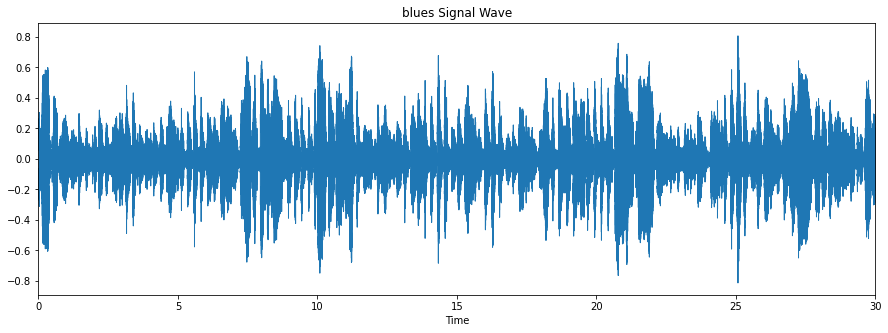

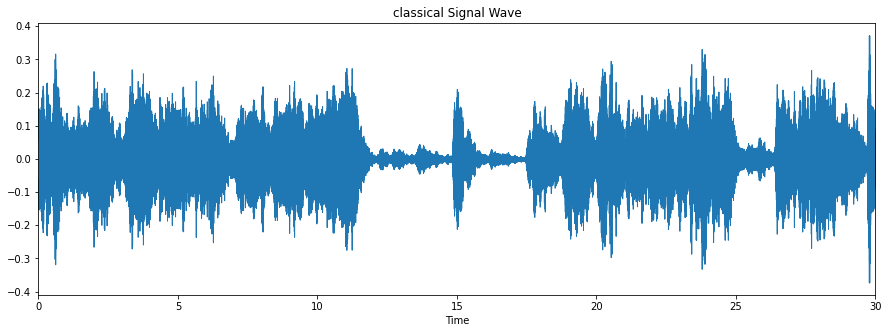

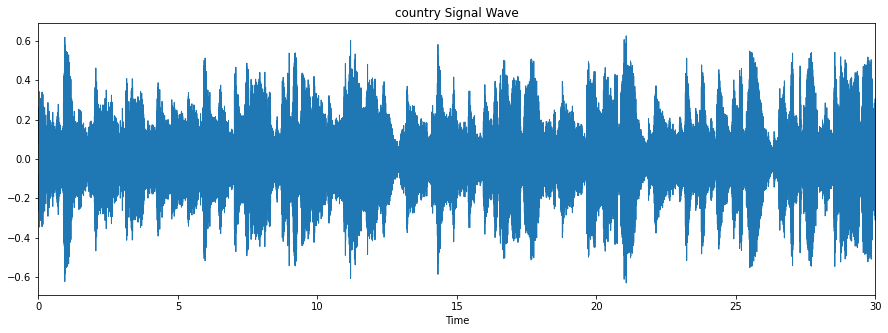

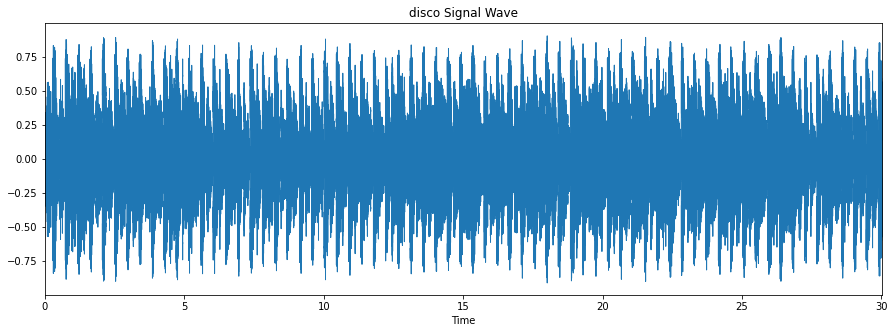

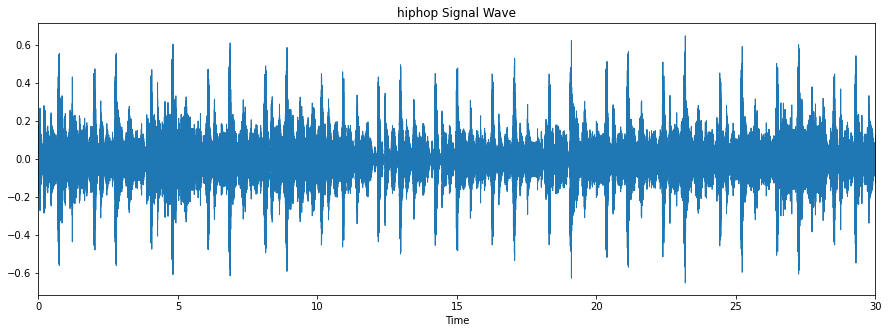

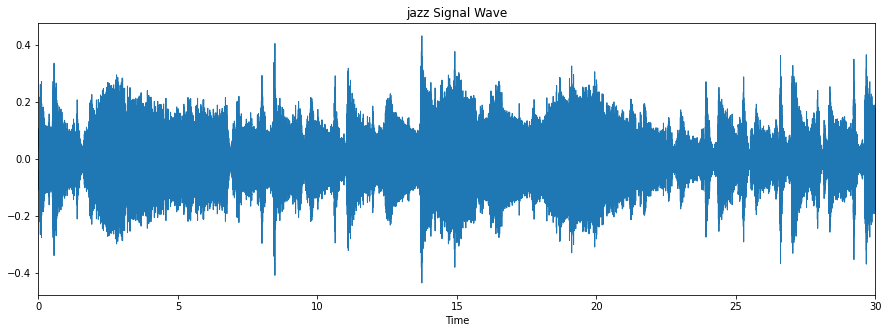

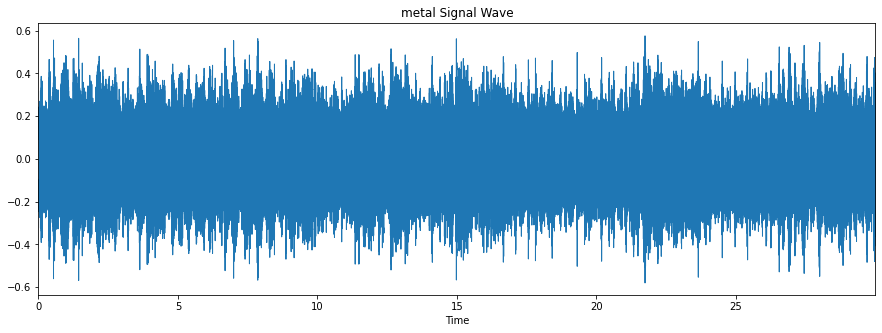

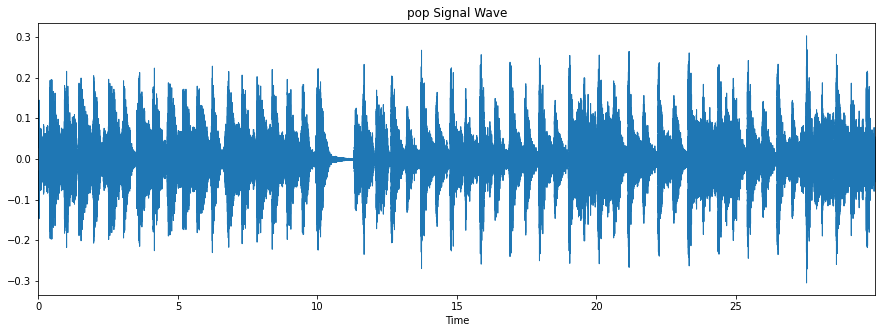

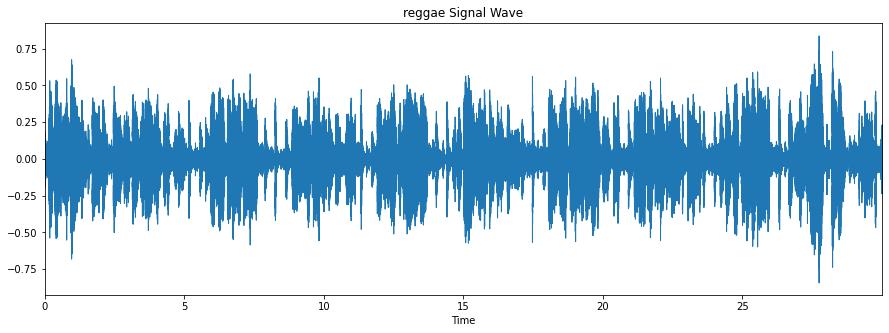

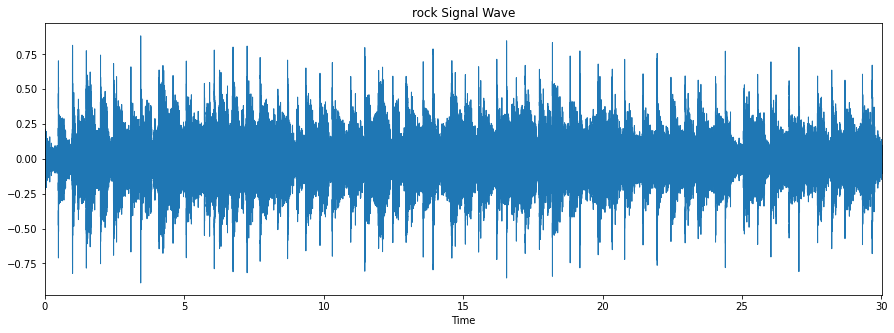

In [ ]:
# plot sample file from each genre
for i,genre in enumerate(genres):
    t = str(random.randint(0,100))
    t = t.rjust(5, '0')
    plt.figure(figsize=(15,5))
    audio_fp = f'{music_library}/{genre}/{genre}.{t}.wav'
    audio_data, sr = librosa.load(audio_fp)
    audio_data, _ = librosa.effects.trim(audio_data)
    librosa.display.waveplot(audio_data)
    plt.title(genre+" Signal Wave")
    plt.show()

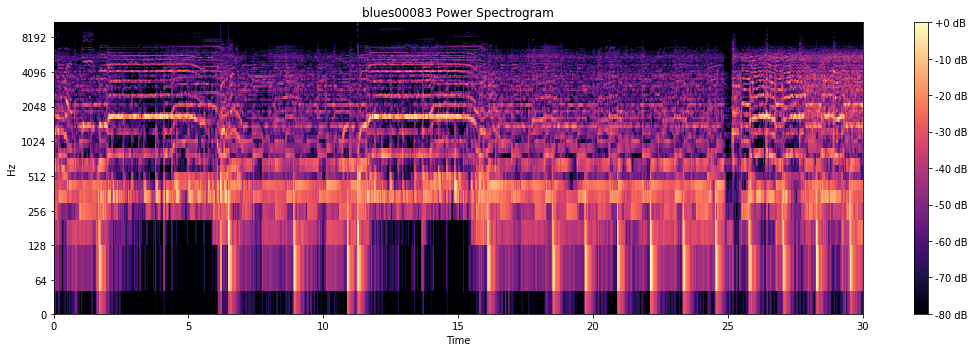

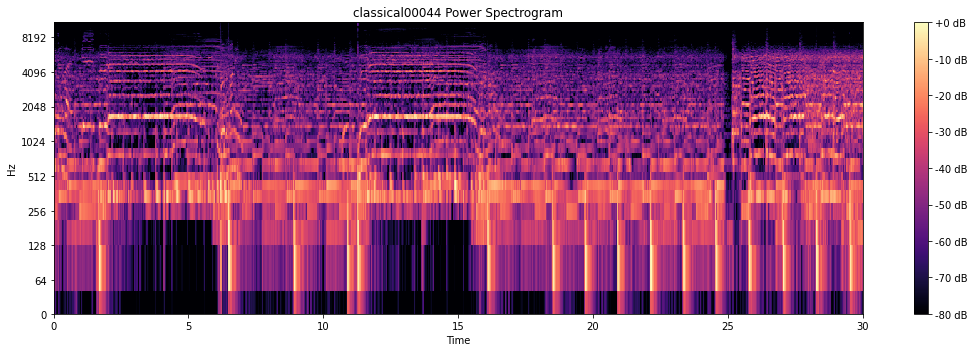

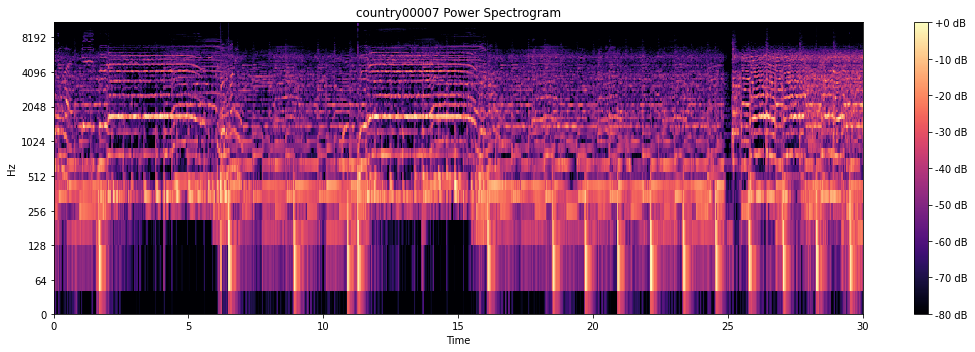

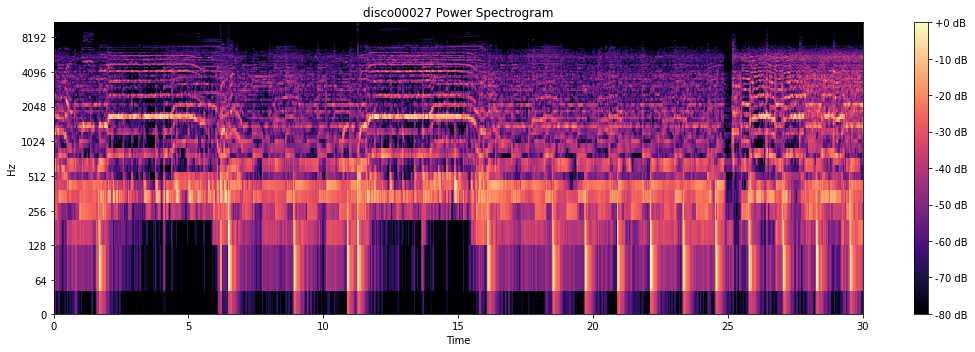

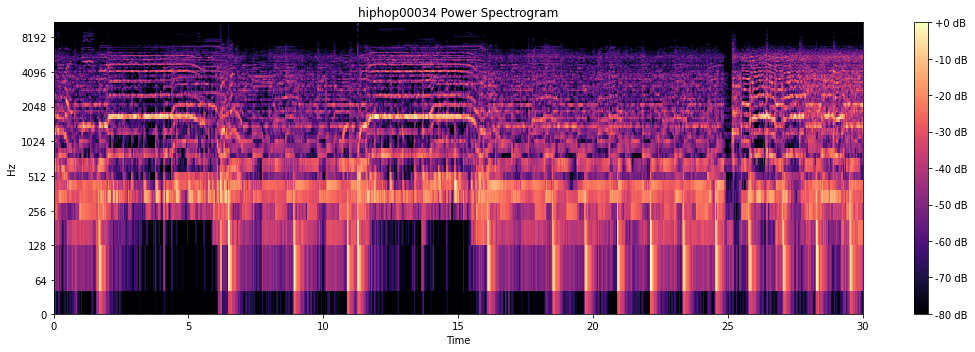

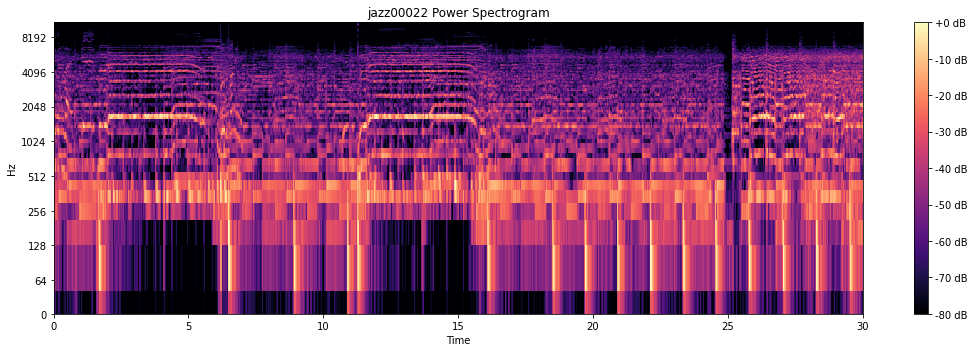

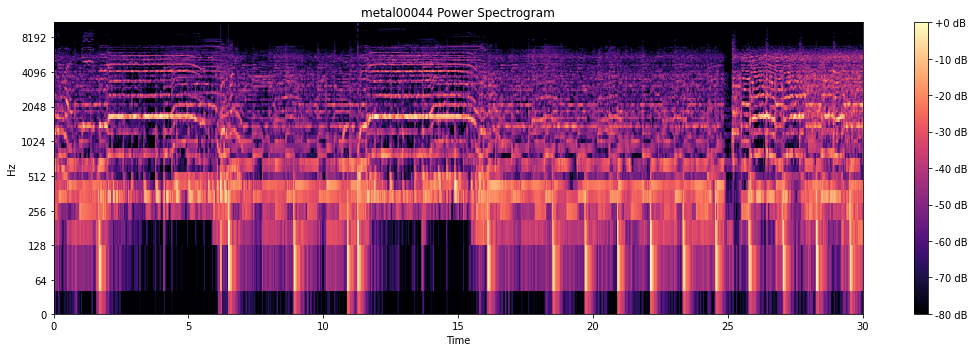

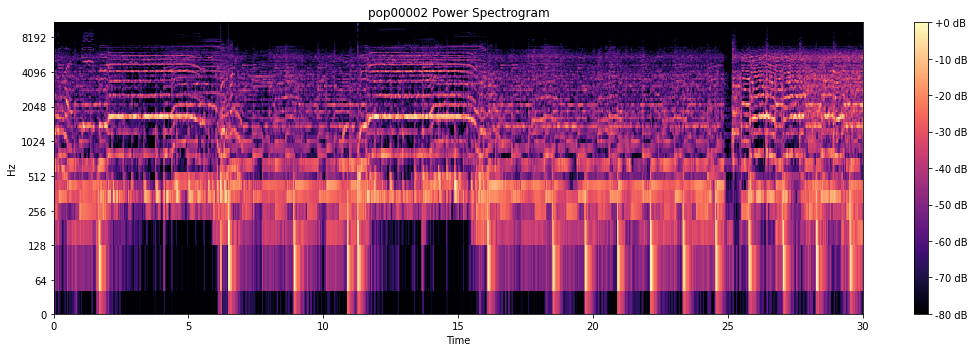

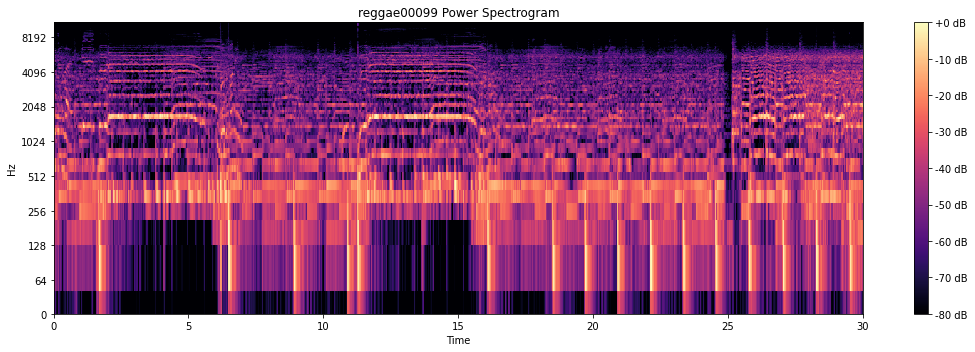

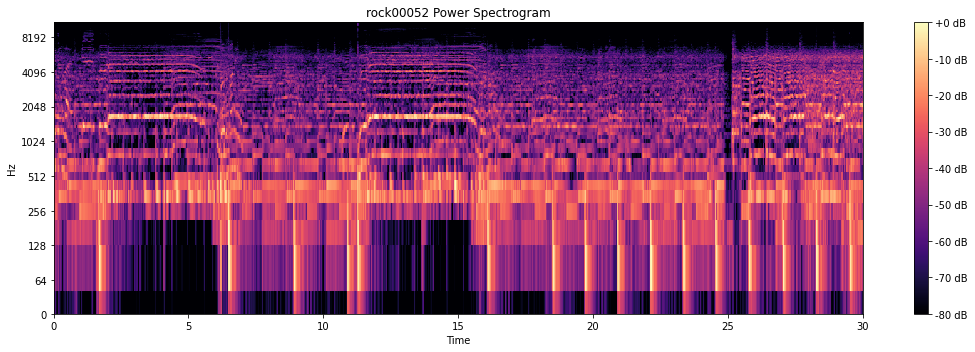

In [ ]:
for i,genre in enumerate(genres):
    t = str(random.randint(0,100))
    t = t.rjust(5, '0')
    plt.figure(figsize=(15,5))
    mel_spec = librosa.feature.melspectrogram(audio_data, sr=sr)
    mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)
    librosa.display.specshow(mel_spec_db, sr=sr, hop_length= 512, x_axis='time', y_axis='log')
    plt.title(genre+ t + " Power Spectrogram")
    plt.colorbar(format='%+2.0f dB')
    plt.tight_layout()
    plt.show()

## Data Pre processing and Feature Extraction

Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study about few of the features in detail.

In this project, 2 types of audio features are extracted.

* Low-level audio feature
* Mel-spectrogram

### Low-level audio feature

#### Split a song into multiple songs

In [ ]:
# split a song into multiple songs
from pydub import AudioSegment
newSong = 'newSong'
i = 0
for g in genres:
  j=0
  print(f"{g}")
  for filename in os.listdir(os.path.join(f'{destination}/data',f"{g}")):
    song  =  os.path.join(f'{destination}/data/{g}',f'{filename}')
    j = j+1
    for w in range(0,5):
      i = i+1
      #print(i)
      t1 = 3*(w)*1000
      t2 = 3*(w+1)*1000
      newAudio = AudioSegment.from_wav(song)
      new = newAudio[t1:t2]
      new.export(f'{destination}/audio3sec/{g}/{g+str(j)+str(w)}.wav', format="wav")

blues
classical
country
disco
hiphop
jazz
metal
pop
reggae
rock


In [ ]:
list_files(destination + '/audio3sec')

audio3sec/
    0
    blues/
        500
    classical/
        500
    country/
        500
    disco/
        500
    hiphop/
        500
    jazz/
        500
    metal/
        500
    pop/
        500
    reggae/
        500
    rock/
        500


 #### Convert audio to melspectograms

0.8.1
rock
Number of files in directory:  500
Processing this song rock10.wav
Processing this song rock10.wav completed in 0.8966436386108398
Processing this song rock100.wav
Processing this song rock100.wav completed in 0.46456003189086914
Processing this song rock1000.wav
Processing this song rock1000.wav completed in 0.48302721977233887
Processing this song rock1001.wav
Processing this song rock1001.wav completed in 0.4075324535369873
Processing this song rock1002.wav
Processing this song rock1002.wav completed in 0.5754497051239014
Processing this song rock1003.wav
Processing this song rock1003.wav completed in 3.5112180709838867
Processing this song rock1004.wav
Processing this song rock1004.wav completed in 0.2391676902770996
Processing this song rock101.wav
Processing this song rock101.wav completed in 0.26631593704223633
Processing this song rock102.wav
Processing this song rock102.wav completed in 0.27324628829956055
Processing this song rock103.wav
Processing this song rock10

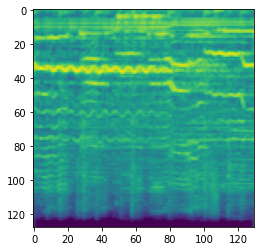

In [ ]:
#!pip install "librosa==0.6.0"
print(librosa.__version__)
k =0 
for g in genres:
  j = 0
  print(g)
  print("Number of files in directory: ", len(os.listdir(os.path.join(destination + '/audio3sec',f"{g}"))))
  files = sorted(os.listdir(os.path.join(destination + '/audio3sec',f"{g}")))
  for filename in files:
    song  =  os.path.join(f'{destination}/audio3sec/{g}',f'{filename}')
    j = j+1
    print(f'Processing this song {filename}')
    start = time.time()
    y,sr = librosa.load(song,duration=3)
    #print(sr)
    mels = librosa.feature.melspectrogram(y=y,sr=sr)
    fig = plt.Figure()
    canvas = FigureCanvas(fig)
    p = plt.imshow(librosa.power_to_db(mels,ref=np.max))
    plt.savefig(f'{destination}/spectrograms3sec/{g}/{g+str(j)}.png')
    end = time.time()
    # total time taken
    print(f"Processing this song {filename} completed in {end - start}") 
    k = k + 1
print (k)

In [ ]:
#Create Test Directory
path = os.path.join(destination + '/spectrograms3sec/test')
if not os.path.exists(path):  
    os.makedirs(path)
else:
    print (path + " Already exists!")

#Create Train Directory
path = os.path.join(destination + '/spectrograms3sec/train')
if not os.path.exists(path):  
    os.makedirs(path)
else:
    print (path + " Already exists!")


In [ ]:
for genre in genres:
   path = os.path.join(destination + '/spectrograms3sec/test',f'{genre}')
   if not os.path.exists(path):  
    os.makedirs(path)
   else:
    print (path + " Already exists!")
   
   path = os.path.join(destination + '/spectrograms3sec/train',f'{genre}')
   if not os.path.exists(path):  
     os.makedirs(path)
   else:
     print (path + " Already exists!")

In [ ]:
for genre in genres:
  source_dir = destination + "/spectrograms3sec/" +  f"{genre}"
  file_names = os.listdir(source_dir)
  print(genre + " -> "+ str(len(file_names)))
  target_dir =  destination +"/spectrograms3sec/train/" + f"{genre}/"
  for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)



blues ->0
classical ->0
country ->0
disco ->0
hiphop ->0
jazz ->0
metal ->0
pop ->0
reggae ->0
rock ->0


In [ ]:

directory = destination + "/spectrograms3sec/train/"
for g in genres:
  filenames = os.listdir(os.path.join(directory,f"{g}"))
  random.shuffle(filenames)
  test_files = filenames[0:100]
  print(g + " -> "+ str(len(test_files)))
  for f in test_files:
    shutil.move(directory + f"{g}"+ "/" + f, destination +"/spectrograms3sec/test/" + f"{g}")


blues -> 100
classical -> 100
country -> 100
disco -> 100
hiphop -> 100
jazz -> 100
metal -> 100
pop -> 100
reggae -> 100
rock -> 100


In [ ]:
train_dir = destination + "/spectrograms3sec/train/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(288,432),color_mode="rgba",class_mode='categorical',batch_size=128)

validation_dir = destination + "/spectrograms3sec/test/"
vali_datagen = ImageDataGenerator(rescale=1./255)
vali_generator = vali_datagen.flow_from_directory(validation_dir,target_size=(288,432),color_mode='rgba',class_mode='categorical',batch_size=128)


Found 4000 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.


## Create and build Convolutional Neural Network Model




<figure>
<center>
<img src='https://github.com/MarkGelo/ML-Topics/raw/43e3175e492cbea1b0c8ac1ee56fb6fb3b62cbf5/Music%20Genre%20Classification/images/CNN.png'/>
<figcaption>CNN diagram</figcaption></center>
</figure>

For building an image classifier here we use deep convolutional neural networks (CNN’s). So,
let’s see what happens in each step in a CNN.

### Layers in a CNN:
 - Convolution Layer
 - Pooling Layer
 - Fully Connected Layer/Dense Layer

_Convolution Layer_: The primary purpose of Convolution in case of a CNN is to extract features from the input image. Convolution preserves the spatial relationship between pixels by learning image features using small squares of input data.
Every image can be considered as a matrix of pixel values. Consider a 7 x 7 image whose pixel values are only 0 and 1 (note that for a grayscale image, pixel values range from 0 to 255, the input matrix below is a special case where pixel values are only 0 and 1). Also, consider another 3 x 3 matrix as shown below. Then, the Convolution of the 7 x 7 image and the 3 x 3 matrix can be computed as shown.

<figure>
<center>
<img src='https://miro.medium.com/max/812/1*xGk_3VdO-iMunW4LwNlsGw.png'/>
<figcaption>Convolution diagram</figcaption></center>
</figure>

Now let’s understands how the computation happened above. We slide the 3 x 3 matrix over our original image (7 x 7) by 1 pixel (also called ‘stride’) and for every position, we compute element wise multiplication (between the two matrices) and add the multiplication outputs to get the final integer which forms a single element of the output matrix (Feature Map). Note that the 3×3 matrix “sees” only a part of the input image in each stride.

In CNN terminology, the 3×3 matrix is called a ‘filter’ or ‘kernel’ or ‘feature detector’ and the matrix formed by sliding the filter over the image and computing the dot product is called the ‘Convolved Feature’ or ‘Activation Map’ or the ‘Feature Map’. It is important to note that filters act as feature detectors from the original input image. 

The size of the Feature Map is controlled by three parameters:

_Depth_: Depth corresponds to the number of filters we use for the convolution operation.

_Stride_: Stride is the number of pixels by which we slide our filter matrix over the input matrix.

_Padding_: Sometimes, it is convenient to pad the input matrix with zeros around the border, so that we can apply the filter to bordering elements of our input image matrix.



An additional operation called ReLU has been used after every Convolution operation. ReLU stands for Rectified Linear Unit and is a non-linear operation. Its output is given by:

<figure>
<center>
<img src='https://www.oreilly.com/library/view/python-natural-language/9781787121423/assets/02c4f3a4-8c9b-405a-88bd-47b79e3981dc.png'/>
<figcaption>ReLu activation function equation</figcaption></center>
</figure>

ReLU is an element wise operation (applied per pixel) and replaces all negative pixel values in the feature map by zero. The purpose of ReLu is to introduce non-linearity in CNN.
Here’s how we add convolutional layers in a neural network including all the different parameters explained above.
```
X = Activation('relu')(X)
```

_Pooling Layer_:
Pooling reduces the dimensionality of each feature map but retains the most important information.
Spatial Pooling can be of different types: Max, Average, Sum etc. In case of Max Pooling, we define a spatial neighborhood (a 2×2 window which we considered in this project) and take the largest element from the rectified feature map within that window.

<figure>
<center>
<img src='https://learnopencv.com/wp-content/uploads/2017/11/max-pooling-demo-768x432.jpg'/>
<figcaption>Max pool layer with filter size 2×2 and stride 2 is shown. The output is the max value in a 2×2 region shown using encircled digits.</figcaption></center>
</figure>


The pooling layer, is used to reduce the spatial dimensions, but not depth, on a CNN, basically this is what you gain:
  1. By having less spatial information you gain computation performance
  2. Less spatial information also means less parameters, so less chance to over-fit
  3. Makes the network invariant to small transformations, distortions and translations in the input image.

Here we add a Max-pooling layer with a pool-size = 2 x 2

```
 X = MaxPooling2D((2,2))(X)
```

_Flattening_: Flattening is the process of converting all the resultant 2 dimensional arrays into a single long continuous linear vector.

Before we give the input to fully connected layer we flatten the input as follows:

```
X = Flatten()(X)
```


_Fully Connected Layer/Dense Layer_: The term “Fully Connected” implies that every neuron in the previous layer is connected to every neuron on the next layer. The output from the convolutional and pooling layers represent high level
features of the input image. The purpose of the Fully Connected layer is to use these features for classifying the input image into various classes based on the training dataset. Fully connected layer uses a ‘softmax’ activation function in the output layer.


_SoftMax_: The SoftMax activation function is useful predominantly in the output layer of a clustering system. Softmax functions convert a raw value into a posterior probability. The sum of output probabilities from the Fully Connected Layer is always 1. This provides a measure of certainty.

Now let’s add a fully connected layer and this is how we do it.

```
X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=9))(X)
```

As explained above, the Convolution and Pooling layers act as Feature Extractors from the input image while Fully Connected layer acts as a classifier.

The overall training process of the Convolution Network is summarized as below:

- We initialize all filters and parameters / weights with random values.
- The network takes a training image as input, goes through the forward propagation step (convolution, ReLU and pooling operations along with forward propagation in the Fully Connected layer) and finds the output probabilities for each class.
- Calculate the total error at the output layer (summation over all 10 classes).
- Use Backpropagation to calculate the gradients of the error with respect to all weights in the network and use gradient descent to update all filter values / weights and parameter values to minimize the output error.

Once we build the sequential model now it’s time to compile it. Arguments added in final compilation will control whole neural network. The choice of Optimization Algorithms and Loss Functions for a deep learning model can play a big role in producing optimum and faster results. 

First argument is optimizer, this is nothing but how you want to find the optimal set of weights.


_Adam_ : Adam stands for Adaptive Moment Estimation. It also calculates different learning rate. Adam is another method that computes adaptive learning rates for each parameter. Adam works well in practice, is faster, and outperforms other techniques.

If we go deeper in detail SGD (Adam here) depends on loss thus our second parameter is loss. Because we have 10 classes in our dependent variable we chose to use ‘Categorical Cross-Entropy’ as our loss function.

_get_f1()_ : is used to compute the f1_score, and for using data generators while training we use fit_generator() method.

_Error and Loss Function_: In most learning networks, error is calculated as the difference between the actual output and the predicted output. The function that is used to compute this error is known as Loss Function.

In [1]:
def GenreModel(input_shape = (288,432,4),classes=10):
  np.random.seed(9)
  X_input = Input(input_shape)

  X = Conv2D(8,kernel_size=(3,3),strides=(1,1),kernel_initializer = glorot_uniform(seed=9))(X_input)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(16,kernel_size=(3,3),strides = (1,1),kernel_initializer=glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)
  
  X = Conv2D(32,kernel_size=(3,3),strides = (1,1),kernel_initializer = glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=3)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  X = Conv2D(64,kernel_size=(3,3),strides=(1,1),kernel_initializer=glorot_uniform(seed=9))(X)
  X = BatchNormalization(axis=-1)(X)
  X = Activation('relu')(X)
  X = MaxPooling2D((2,2))(X)

  
  X = Flatten()(X)

  X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=9))(X)

  model = Model(inputs=X_input,outputs=X,name='GenreModel')

  return model


In [ ]:
import keras.backend as K
def get_f1(y_true, y_pred): #taken from old keras source code
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

In [ ]:
model = GenreModel(input_shape=(288,432,4),classes=10)
opt = Adam(learning_rate=0.00005)
model.compile(optimizer = opt,loss='categorical_crossentropy',metrics=['accuracy',get_f1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
model.summary()

Model: "GenreModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 288, 432, 4)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 286, 430, 8)       296       
_________________________________________________________________
batch_normalization_1 (Batch (None, 286, 430, 8)       32        
_________________________________________________________________
activation_1 (Activation)    (None, 286, 430, 8)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 143, 215, 8)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 141, 213, 16)      1168      
_________________________________________________________________
batch_normalization_2 (Batch (None, 141, 213, 16)      6

### Visualise the Model

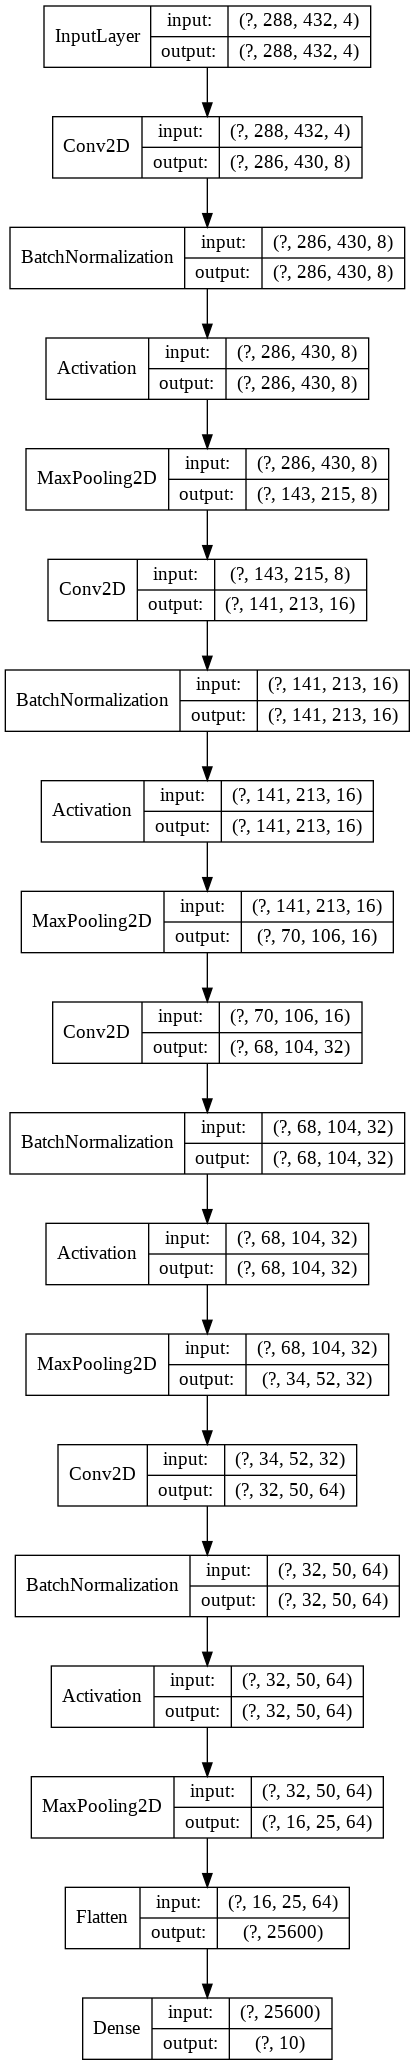

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

### Run the model
We run the model with the training set. We are also using the validation set (a subset from the orginal training set) for validation.

In [ ]:
history = model.fit_generator(train_generator,epochs=40,validation_data=vali_generator)


Epoch 1/40


/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 1/32 [..............................] - ETA: 49:38 - loss: 3.1185 - accuracy: 0.0938 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)


 2/32 [>.............................] - ETA: 44:50 - loss: 2.9046 - accuracy: 0.0898 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 22 could not be retrieved. It could be because a worker has died.
  UserWarning)


 3/32 [=>............................] - ETA: 43:25 - loss: 2.7765 - accuracy: 0.1172 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 30 could not be retrieved. It could be because a worker has died.
  UserWarning)


 4/32 [==>...........................] - ETA: 41:42 - loss: 2.6869 - accuracy: 0.1289 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 11 could not be retrieved. It could be because a worker has died.
  UserWarning)


 5/32 [===>..........................] - ETA: 40:11 - loss: 2.6243 - accuracy: 0.1281 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


 6/32 [====>.........................] - ETA: 38:36 - loss: 2.6035 - accuracy: 0.1289 - get_f1: 0.0000e+00

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 21 could not be retrieved. It could be because a worker has died.
  UserWarning)


 7/32 [=====>........................] - ETA: 37:24 - loss: 2.5940 - accuracy: 0.1295 - get_f1: 0.0043    

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 25 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/32 [======>.......................] - ETA: 35:58 - loss: 2.5654 - accuracy: 0.1289 - get_f1: 0.0130

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 27 could not be retrieved. It could be because a worker has died.
  UserWarning)


 9/32 [=======>......................] - ETA: 34:32 - loss: 2.5407 - accuracy: 0.1250 - get_f1: 0.0133

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 7 could not be retrieved. It could be because a worker has died.
  UserWarning)


10/32 [========>.....................] - ETA: 33:10 - loss: 2.5042 - accuracy: 0.1344 - get_f1: 0.0135

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 17 could not be retrieved. It could be because a worker has died.
  UserWarning)


11/32 [=========>....................] - ETA: 31:42 - loss: 2.4840 - accuracy: 0.1371 - get_f1: 0.0123

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 8 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/32 [==========>...................] - ETA: 30:15 - loss: 2.4574 - accuracy: 0.1478 - get_f1: 0.0113

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 23 could not be retrieved. It could be because a worker has died.
  UserWarning)


13/32 [===========>..................] - ETA: 28:55 - loss: 2.4511 - accuracy: 0.1490 - get_f1: 0.0104

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)


14/32 [============>.................] - ETA: 27:29 - loss: 2.4357 - accuracy: 0.1540 - get_f1: 0.0096

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 18 could not be retrieved. It could be because a worker has died.
  UserWarning)


15/32 [=============>................] - ETA: 26:10 - loss: 2.4218 - accuracy: 0.1547 - get_f1: 0.0090

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)


16/32 [==============>...............] - ETA: 24:50 - loss: 2.4110 - accuracy: 0.1558 - get_f1: 0.0084

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/32 [==============>...............] - ETA: 23:49 - loss: 2.3916 - accuracy: 0.1636 - get_f1: 0.0079

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 28 could not be retrieved. It could be because a worker has died.
  UserWarning)


18/32 [===============>..............] - ETA: 22:22 - loss: 2.3792 - accuracy: 0.1667 - get_f1: 0.0075

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 20 could not be retrieved. It could be because a worker has died.
  UserWarning)


19/32 [================>.............] - ETA: 21:01 - loss: 2.3658 - accuracy: 0.1711 - get_f1: 0.0071

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 16 could not be retrieved. It could be because a worker has died.
  UserWarning)


20/32 [=================>............] - ETA: 19:24 - loss: 2.3519 - accuracy: 0.1766 - get_f1: 0.0068

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 9 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/32 [==================>...........] - ETA: 17:46 - loss: 2.3419 - accuracy: 0.1775 - get_f1: 0.0064

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 29 could not be retrieved. It could be because a worker has died.
  UserWarning)


22/32 [===================>..........] - ETA: 16:09 - loss: 2.3294 - accuracy: 0.1829 - get_f1: 0.0061

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 15 could not be retrieved. It could be because a worker has died.
  UserWarning)


23/32 [====================>.........] - ETA: 14:30 - loss: 2.3201 - accuracy: 0.1844 - get_f1: 0.0059

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 13 could not be retrieved. It could be because a worker has died.
  UserWarning)


24/32 [=====================>........] - ETA: 12:53 - loss: 2.3109 - accuracy: 0.1875 - get_f1: 0.0063

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 19 could not be retrieved. It could be because a worker has died.
  UserWarning)


25/32 [======================>.......] - ETA: 11:18 - loss: 2.2978 - accuracy: 0.1919 - get_f1: 0.0079

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/32 [=======================>......] - ETA: 9:41 - loss: 2.2887 - accuracy: 0.1941 - get_f1: 0.0093 

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 12 could not be retrieved. It could be because a worker has died.
  UserWarning)


27/32 [========================>.....] - ETA: 8:03 - loss: 2.2832 - accuracy: 0.1965 - get_f1: 0.0095

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 24 could not be retrieved. It could be because a worker has died.
  UserWarning)


28/32 [=========================>....] - ETA: 6:27 - loss: 2.2749 - accuracy: 0.1987 - get_f1: 0.0097

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 14 could not be retrieved. It could be because a worker has died.
  UserWarning)


29/32 [==========================>...] - ETA: 4:50 - loss: 2.2646 - accuracy: 0.2010 - get_f1: 0.0094

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 10 could not be retrieved. It could be because a worker has died.
  UserWarning)


30/32 [===========================>..] - ETA: 3:13 - loss: 2.2594 - accuracy: 0.2005 - get_f1: 0.0101

/tensorflow-1.15.2/python3.7/keras/utils/data_utils.py:616: UserWarning: The input 26 could not be retrieved. It could be because a worker has died.
  UserWarning)


32/32 [==============================] - 3026s 95s/step - loss: 2.2444 - accuracy: 0.2042 - get_f1: 0.0109 - val_loss: 2.3349 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 2/40
32/32 [==============================] - 38s 1s/step - loss: 1.8686 - accuracy: 0.3232 - get_f1: 0.0866 - val_loss: 2.2994 - val_accuracy: 0.1000 - val_get_f1: 0.0000e+00
Epoch 3/40
32/32 [==============================] - 40s 1s/step - loss: 1.6927 - accuracy: 0.3975 - get_f1: 0.1580 - val_loss: 2.2859 - val_accuracy: 0.1860 - val_get_f1: 0.0000e+00
Epoch 4/40
32/32 [==============================] - 39s 1s/step - loss: 1.5575 - accuracy: 0.4445 - get_f1: 0.2260 - val_loss: 2.3428 - val_accuracy: 0.1950 - val_get_f1: 0.0000e+00
Epoch 5/40
32/32 [==============================] - 40s 1s/step - loss: 1.4363 - accuracy: 0.5077 - get_f1: 0.2885 - val_loss: 2.2983 - val_accuracy: 0.1990 - val_get_f1: 0.0000e+00
Epoch 6/40
32/32 [==============================] - 39s 1s/step - loss: 1.3418 - accuracy: 0.5447 

### Evaluate model with test data and view results

In [ ]:
def plot_performance(hist):
    
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()

    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.plot(epochs, val_loss, 'b', label='Validation Loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

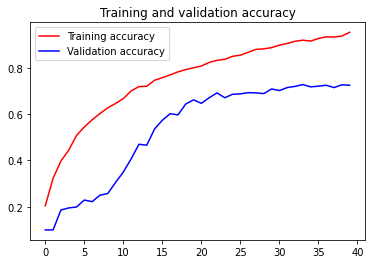

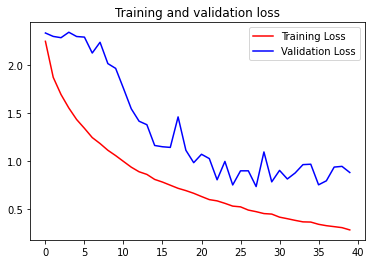

In [ ]:

plot_performance(history)

# Conclusion


In this music genre classification project, we have developed a classifier on audio files to predict its genre by extracting important features from audio files. We worked through this project using the GTZAN dataset. we have also implemented a Convolutional Neural Network that classified music genres using a spectrogram (a visual representation of the spectrum signal frequencies as it varies with time). 

# References

- S. Vishnupriya and K. Meenakshi, "Automatic Music GenreClassification using Convolution Neural Network," 2018 International Conference on Computer Communication and Informatics (ICCCI), 2018, pp. 1 4, doi : 10.1109/ICCCI.

- Rai, S., 2022. Music Genres Classification using Deep learning
techniques . [online] Analytics Vidhya. Available at:
<https://www.analyticsvidhya.com/blog/2021/06/music genres
classification using deep learning techniques/> [Accessed 22
February 2022].

- Regular , 2020. Musical Genre Classification using Convolutional
Neural Networks. 10(1), pp.228 230.
